In [29]:
import json
import urllib.request

urls = {}
with open("download_urls.json") as f:
    urls = json.load(f)

In [41]:
MERRA2_URLS = urls["MERRA2_TMIN_TMAX_TAVG"]

In [36]:
API_KEY = "sI2lsFBdcKxbLna2BuxWYOd0lgvIMj049sfBO3CC"
full_url = url.split("{API_KEY}")[0] + API_KEY

'https://tds.ucar.edu/thredds/fileServer/datazone/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/daily/TREFHTMN/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h1.TREFHTMN.18500101-20051231.nc?api-token=sI2lsFBdcKxbLna2BuxWYOd0lgvIMj049sfBO3CC'

In [37]:
import urllib.request
urllib.request.urlretrieve(full_url, "test.nc")


KeyboardInterrupt



In [30]:
from distributed import Client
import numpy as np
import dask


client = Client('localhost:8786')
client.restart()

<Client: 'tcp://146.6.192.149:8786' processes=0 threads=0, memory=0 B>

In [56]:
from os import listdir
import xarray
import geopandas as gpd
import cftime

INPUT_DIR = "/projects/dgs/persad_research/Nduka_data/evaluation/CHELSA/source/"


def modify_ds(path):
    ds = xarray.open_dataset(path, engine="rasterio")
    month, day, year = name.split("land_")[1].split("_V")[0].split("_")
    date = cftime.datetime(int(year), int(day), int(month))
    return ds.assign_coords({"time": date})

datasets = []
for name in listdir(INPUT_DIR):
    if ".tif" in name:
        datasets.append(INPUT_DIR + name)

In [58]:
futures = client.map(modify_ds, datasets)

In [ ]:
results = client.gather(futures)

In [32]:
concat_ds = xarray.concat(datasets, dim="time")
concat_ds


KeyboardInterrupt



In [1]:
concat_ds

NameError: name 'concat_ds' is not defined

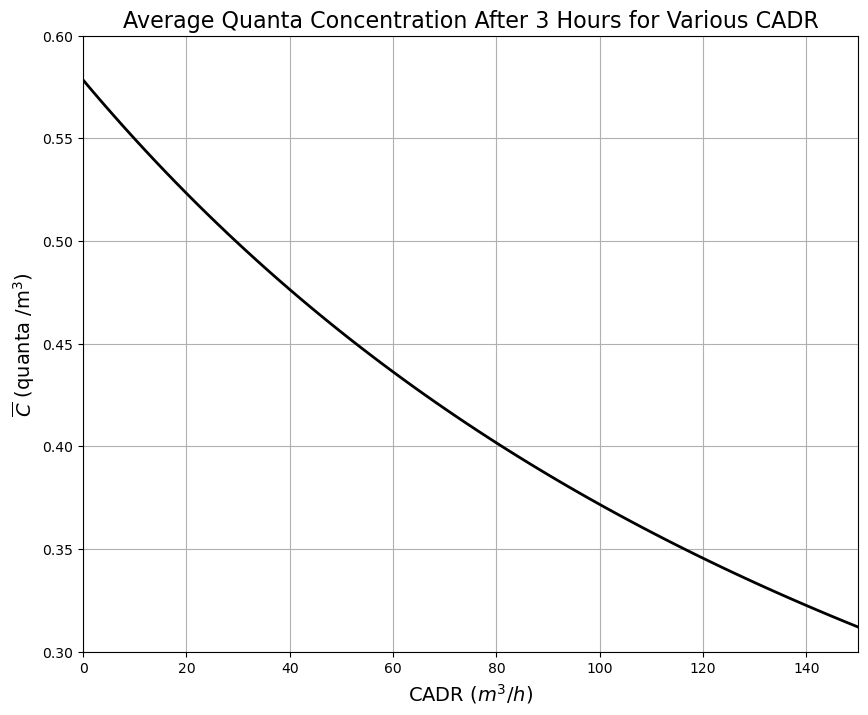

In [20]:
from os import listdir
import xarray
import cftime
import numpy as np
import matplotlib.pyplot as plt

results = []
CADRs = []
for CADR in np.arange(0, 152, 2):
    beta = 0.4 + (CADR/150) + 0.1
    times = np.linspace(0, 3, 100)
    vals = 30 / (beta*150)*(1 - np.exp(-1*times*beta))
    result = np.trapz(vals, times, dx=times[1] - times[0])

    results.append(result)
    CADRs.append(CADR)

f, ax1 = plt.subplots(1, 1, figsize=(10, 8), facecolor='w')
ax1.plot(CADRs, results, color="Black", linewidth=2)
ax1.set_xlim(0, 150)
ax1.set_ylim(0.3, 0.6)
ax1.set_xlabel("CADR ($m^3 / h$)", fontsize=14)
ax1.set_ylabel("$\\overline{C}$ (quanta $/\\text{m}^3$)", fontsize=14)
ax1.set_title("Average Quanta Concentration After 3 Hours for Various CADR", fontsize=16)
ax1.grid()

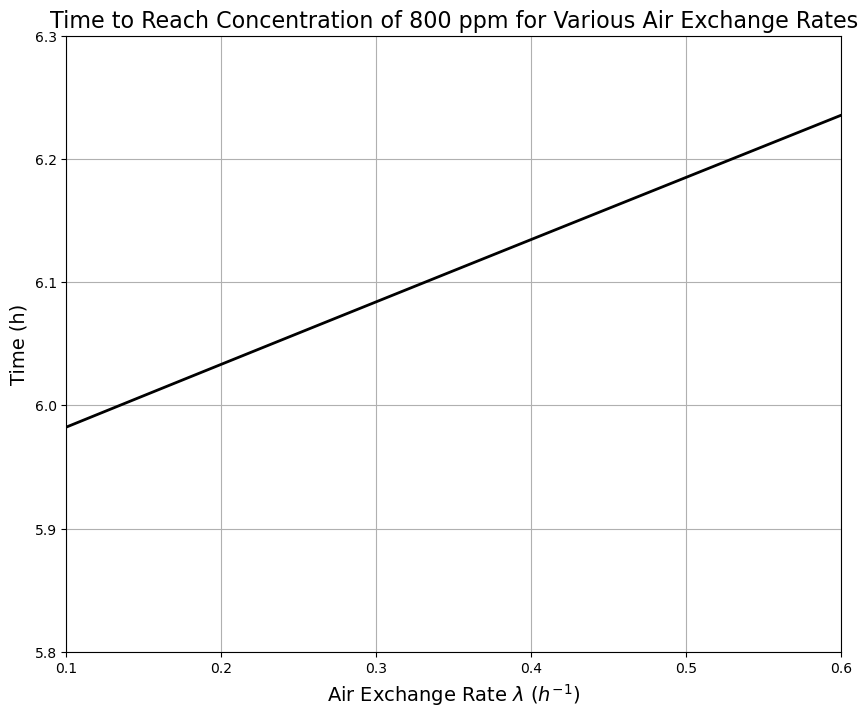

In [28]:
from os import listdir
import xarray
import cftime
import numpy as np
import matplotlib.pyplot as plt

lambdas = np.linspace(0.1, 0.6, 100)
times = -1*np.log((1.932 / (415+121.8*lambdas)) - 0.002)


f, ax1 = plt.subplots(1, 1, figsize=(10, 8), facecolor='w')
ax1.plot(lambdas, times, color="Black", linewidth=2)
ax1.set_xlim(0.1, 0.6)
ax1.set_ylim(5.8, 6.3)
ax1.set_xlabel("Air Exchange Rate $\\lambda$ ($h^{-1}$)", fontsize=14)
ax1.set_ylabel("Time (h)", fontsize=14)
ax1.set_title("Time to Reach Concentration of 800 ppm for Various Air Exchange Rates", fontsize=16)
ax1.grid()